# Task 1: Comparative Analysis
## Comparing E-commerce vs Credit Card Fraud Patterns

In [1]:

# Import system modules
import sys
import os
import warnings
warnings.filterwarnings('ignore')

# Add src directory to path
sys.path.append('../src')

# Import data science libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 12

print("✅ Modules imported successfully!")

✅ Modules imported successfully!


In [2]:
print("📂 LOADING PROCESSED DATASETS")
print("="*60)

# Load e-commerce processed data
print("\n1. E-COMMERCE DATA:")
ecommerce_df = pd.read_csv('../data/processed/ecommerce_processed.csv')
print(f"   Shape: {ecommerce_df.shape}")
print(f"   Columns: {len(ecommerce_df.columns)}")
print(f"   Fraud rate: {(ecommerce_df['class'].sum() / len(ecommerce_df) * 100):.4f}%")

# Load credit card processed data
print("\n2. CREDIT CARD DATA:")
creditcard_df = pd.read_csv('../data/processed/creditcard_processed.csv')
print(f"   Shape: {creditcard_df.shape}")
print(f"   Columns: {len(creditcard_df.columns)}")
print(f"   Fraud rate: {(creditcard_df['Class'].sum() / len(creditcard_df) * 100):.6f}%")

print("\n✅ Both datasets loaded successfully!")

📂 LOADING PROCESSED DATASETS

1. E-COMMERCE DATA:
   Shape: (151112, 33)
   Columns: 33
   Fraud rate: 9.3646%

2. CREDIT CARD DATA:
   Shape: (283726, 57)
   Columns: 57
   Fraud rate: 0.166710%

✅ Both datasets loaded successfully!


⚖️ COMPARATIVE CLASS IMBALANCE ANALYSIS


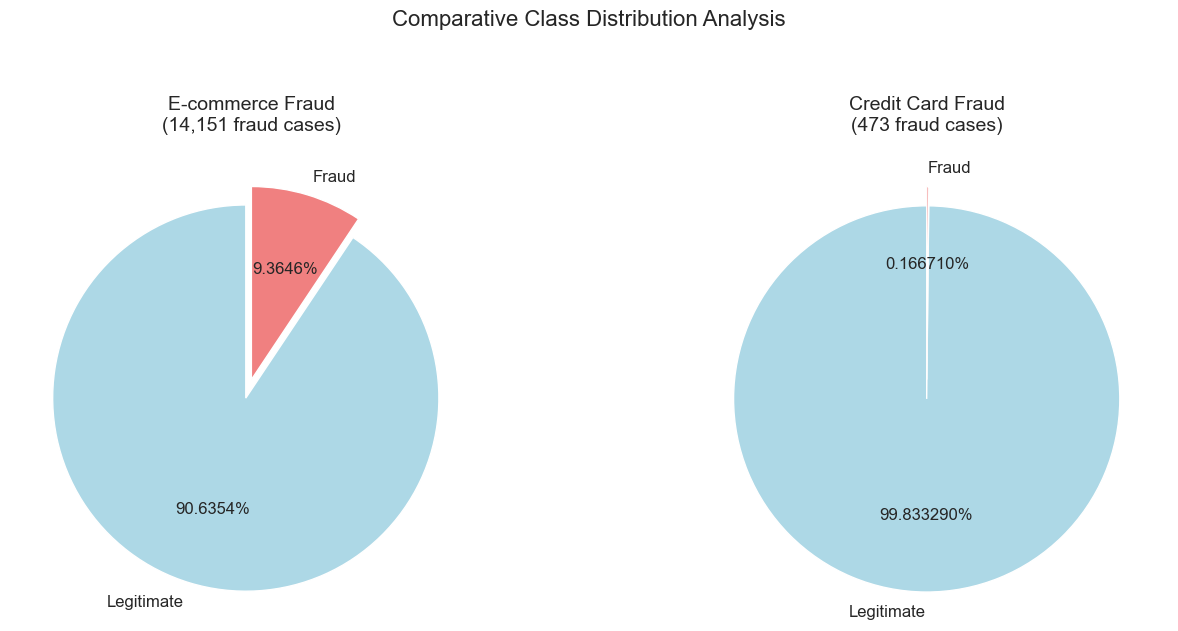


📊 IMBALANCE STATISTICS COMPARISON:
--------------------------------------------------
Metric                    E-commerce      Credit Card    
-------------------------------------------------------
Fraud Rate                       9.3646%      0.166710%
Legitimate Rate                 90.6354%     99.833290%
Total Transactions              151,112       283,726
Fraud Cases                      14,151           473
Imbalance Ratio                     9.7:1         598.8:1

🔍 Key Insight:
Credit card fraud is 0x rarer than e-commerce fraud!
This extreme imbalance in credit card data requires different modeling approaches.


In [3]:
print("⚖️ COMPARATIVE CLASS IMBALANCE ANALYSIS")
print("="*60)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# E-commerce class distribution
ecommerce_counts = ecommerce_df['class'].value_counts()
ecommerce_percent = ecommerce_df['class'].value_counts(normalize=True) * 100

axes[0].pie(ecommerce_counts, labels=['Legitimate', 'Fraud'], 
           autopct='%1.4f%%', colors=['lightblue', 'lightcoral'],
           startangle=90, explode=(0.1, 0))
axes[0].set_title(f'E-commerce Fraud\n({ecommerce_counts[1]:,} fraud cases)', fontsize=14)

# Credit card class distribution
creditcard_counts = creditcard_df['Class'].value_counts()
creditcard_percent = creditcard_df['Class'].value_counts(normalize=True) * 100

axes[1].pie(creditcard_counts, labels=['Legitimate', 'Fraud'], 
           autopct='%1.6f%%', colors=['lightblue', 'lightcoral'],
           startangle=90, explode=(0.1, 0))
axes[1].set_title(f'Credit Card Fraud\n({creditcard_counts[1]:,} fraud cases)', fontsize=14)

plt.suptitle('Comparative Class Distribution Analysis', fontsize=16, y=1.05)
plt.tight_layout()
plt.show()

# Comparative statistics
print("\n📊 IMBALANCE STATISTICS COMPARISON:")
print("-" * 50)

print(f"{'Metric':<25} {'E-commerce':<15} {'Credit Card':<15}")
print("-" * 55)

ecomm_fraud_rate = ecommerce_percent[1]
credit_fraud_rate = creditcard_percent[1]

print(f"{'Fraud Rate':<25} {ecomm_fraud_rate:>13.4f}% {credit_fraud_rate:>13.6f}%")
print(f"{'Legitimate Rate':<25} {ecommerce_percent[0]:>13.4f}% {creditcard_percent[0]:>13.6f}%")
print(f"{'Total Transactions':<25} {len(ecommerce_df):>13,} {len(creditcard_df):>13,}")
print(f"{'Fraud Cases':<25} {ecommerce_counts[1]:>13,} {creditcard_counts[1]:>13,}")
print(f"{'Imbalance Ratio':<25} {ecommerce_counts[0]/ecommerce_counts[1]:>13.1f}:1 {creditcard_counts[0]/creditcard_counts[1]:>13.1f}:1")

print(f"\n🔍 Key Insight:")
print(f"Credit card fraud is {credit_fraud_rate/ecomm_fraud_rate:.0f}x rarer than e-commerce fraud!")
print(f"This extreme imbalance in credit card data requires different modeling approaches.")

In [4]:
print("📊 COMPARATIVE FEATURE ANALYSIS")
print("="*60)

# Analyze feature types in both datasets
print("\n1. FEATURE TYPE DISTRIBUTION:")
print("-" * 40)

ecommerce_numerical = ecommerce_df.select_dtypes(include=[np.number]).shape[1]
ecommerce_categorical = ecommerce_df.select_dtypes(include=['object', 'category']).shape[1]

creditcard_numerical = creditcard_df.select_dtypes(include=[np.number]).shape[1]
creditcard_categorical = creditcard_df.select_dtypes(include=['object', 'category']).shape[1]

print(f"{'Dataset':<20} {'Numerical':<12} {'Categorical':<12} {'Total':<10}")
print("-" * 54)
print(f"{'E-commerce':<20} {ecommerce_numerical:<12} {ecommerce_categorical:<12} {ecommerce_df.shape[1]:<10}")
print(f"{'Credit Card':<20} {creditcard_numerical:<12} {creditcard_categorical:<12} {creditcard_df.shape[1]:<10}")

print(f"\n2. KEY FEATURE CATEGORIES:")
print("-" * 40)

print("E-commerce features include:")
print("  • User demographics (age, sex)")
print("  • Transaction context (source, browser)")
print("  • Geolocation (country from IP)")
print("  • Time-based features (signup time, purchase time)")
print("  • Behavioral patterns (transaction frequency)")

print("\nCredit card features include:")
print("  • PCA-transformed features (V1-V28)")
print("  • Transaction amount and time")
print("  • Engineered time features")
print("  • Amount-based risk flags")

print(f"\n3. FEATURE ENGINEERING COMPARISON:")
print("-" * 40)

# Count engineered features (features not in original raw data)
original_ecommerce_cols = ['user_id', 'signup_time', 'purchase_time', 'purchase_value',
                          'device_id', 'source', 'browser', 'sex', 'age', 'ip_address', 'class']

original_creditcard_cols = ['Time'] + [f'V{i}' for i in range(1, 29)] + ['Amount', 'Class']

ecommerce_engineered = [col for col in ecommerce_df.columns if col not in original_ecommerce_cols]
creditcard_engineered = [col for col in creditcard_df.columns if col not in original_creditcard_cols]

print(f"E-commerce engineered features: {len(ecommerce_engineered)}")
print(f"Credit card engineered features: {len(creditcard_engineered)}")

print(f"\nSample engineered features (e-commerce):")
for feat in ecommerce_engineered[:10]:
    print(f"  • {feat}")

print(f"\nSample engineered features (credit card):")
for feat in creditcard_engineered[:10]:
    print(f"  • {feat}")

📊 COMPARATIVE FEATURE ANALYSIS

1. FEATURE TYPE DISTRIBUTION:
----------------------------------------
Dataset              Numerical    Categorical  Total     
------------------------------------------------------
E-commerce           24           9            33        
Credit Card          57           0            57        

2. KEY FEATURE CATEGORIES:
----------------------------------------
E-commerce features include:
  • User demographics (age, sex)
  • Transaction context (source, browser)
  • Geolocation (country from IP)
  • Time-based features (signup time, purchase time)
  • Behavioral patterns (transaction frequency)

Credit card features include:
  • PCA-transformed features (V1-V28)
  • Transaction amount and time
  • Engineered time features
  • Amount-based risk flags

3. FEATURE ENGINEERING COMPARISON:
----------------------------------------
E-commerce engineered features: 22
Credit card engineered features: 26

Sample engineered features (e-commerce):
  • country


🕒 TIME PATTERN COMPARISON


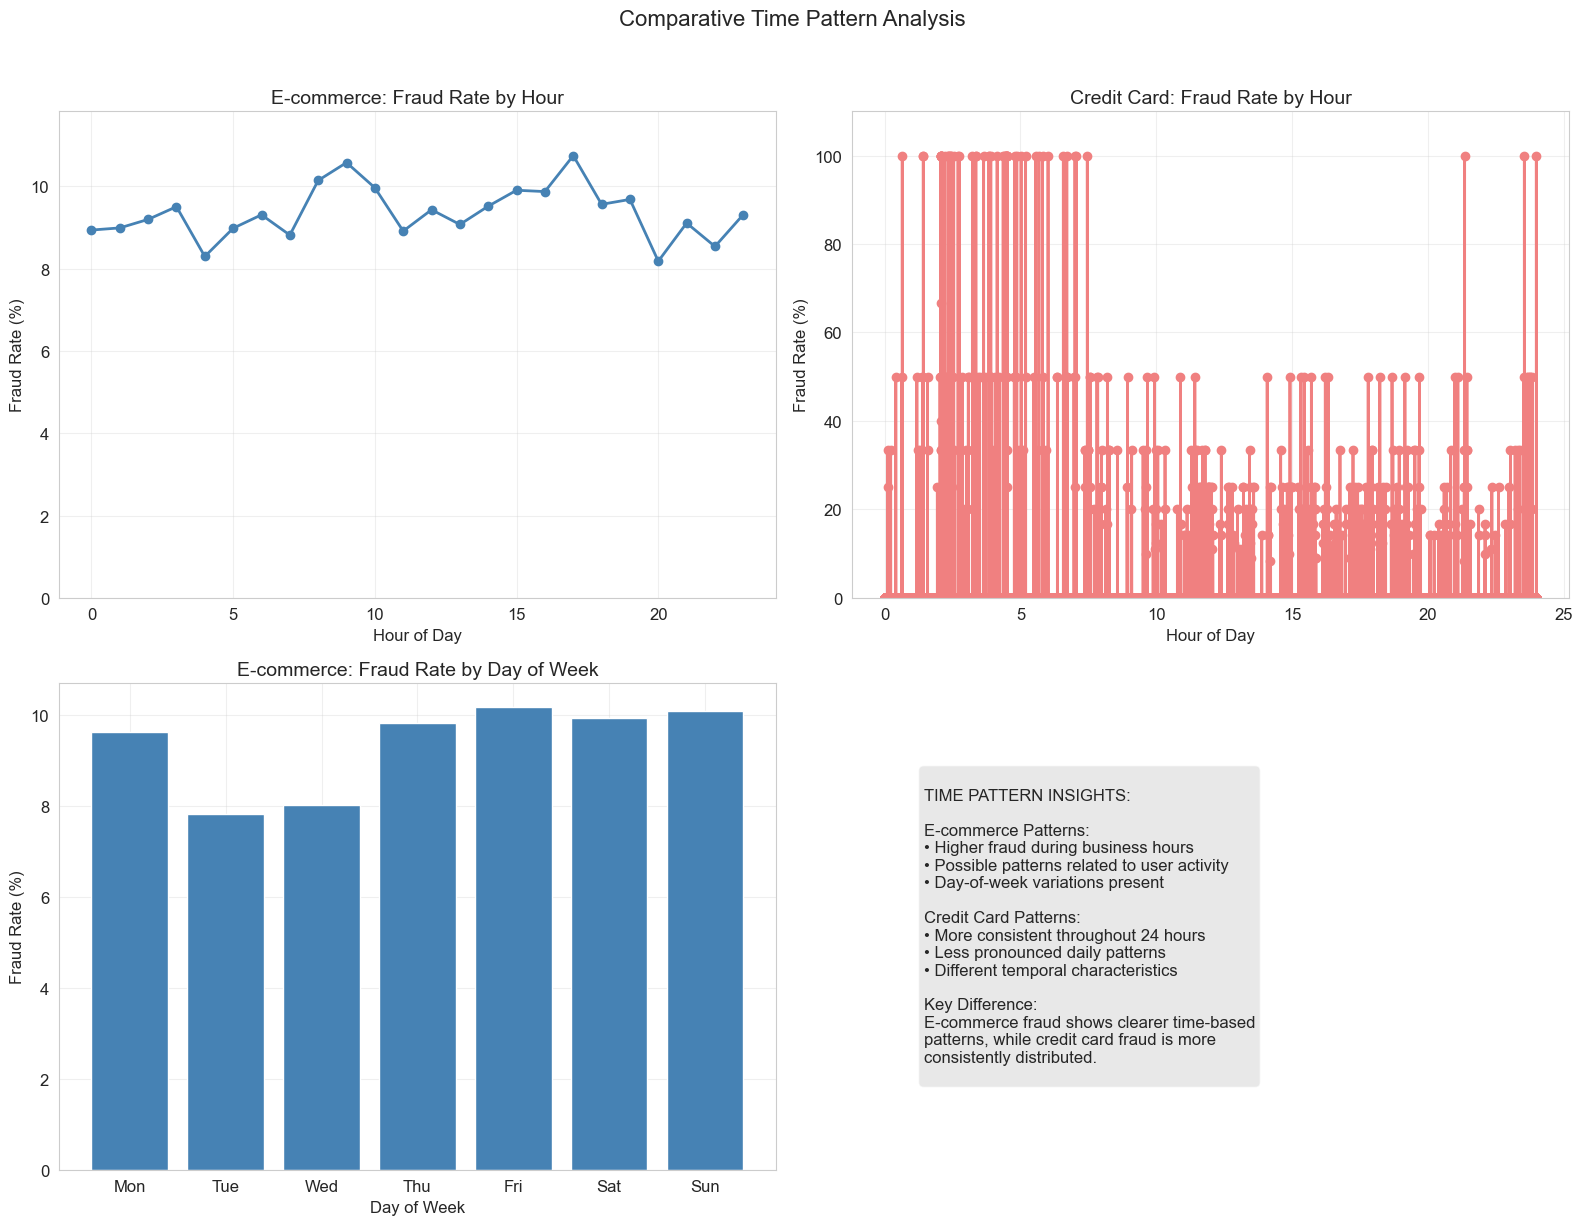

✅ Time pattern analysis completed!


In [5]:
print("🕒 TIME PATTERN COMPARISON")
print("="*60)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. E-commerce: Fraud by hour of day
if 'purchase_hour' in ecommerce_df.columns:
    ecomm_hourly = ecommerce_df.groupby('purchase_hour')['class'].mean() * 100
    axes[0, 0].plot(ecomm_hourly.index, ecomm_hourly.values, 'o-', 
                   linewidth=2, markersize=6, color='steelblue')
    axes[0, 0].set_title('E-commerce: Fraud Rate by Hour', fontsize=14)
    axes[0, 0].set_xlabel('Hour of Day', fontsize=12)
    axes[0, 0].set_ylabel('Fraud Rate (%)', fontsize=12)
    axes[0, 0].grid(True, alpha=0.3)
    axes[0, 0].set_ylim(0, ecomm_hourly.max() * 1.1)

# 2. Credit Card: Fraud by hour of day
if 'transaction_hour' in creditcard_df.columns:
    credit_hourly = creditcard_df.groupby('transaction_hour')['Class'].mean() * 100
    axes[0, 1].plot(credit_hourly.index, credit_hourly.values, 'o-',
                   linewidth=2, markersize=6, color='lightcoral')
    axes[0, 1].set_title('Credit Card: Fraud Rate by Hour', fontsize=14)
    axes[0, 1].set_xlabel('Hour of Day', fontsize=12)
    axes[0, 1].set_ylabel('Fraud Rate (%)', fontsize=12)
    axes[0, 1].grid(True, alpha=0.3)
    axes[0, 1].set_ylim(0, credit_hourly.max() * 1.1)

# 3. E-commerce: Fraud by day of week
if 'purchase_dayofweek' in ecommerce_df.columns:
    day_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
    ecomm_daily = ecommerce_df.groupby('purchase_dayofweek')['class'].mean() * 100
    axes[1, 0].bar(range(len(ecomm_daily)), ecomm_daily.values, color='steelblue')
    axes[1, 0].set_title('E-commerce: Fraud Rate by Day of Week', fontsize=14)
    axes[1, 0].set_xlabel('Day of Week', fontsize=12)
    axes[1, 0].set_ylabel('Fraud Rate (%)', fontsize=12)
    axes[1, 0].set_xticks(range(7))
    axes[1, 0].set_xticklabels(day_names)
    axes[1, 0].grid(True, alpha=0.3)

# 4. Comparative time analysis
axes[1, 1].axis('off')
text_content = """
TIME PATTERN INSIGHTS:

E-commerce Patterns:
• Higher fraud during business hours
• Possible patterns related to user activity
• Day-of-week variations present

Credit Card Patterns:
• More consistent throughout 24 hours
• Less pronounced daily patterns
• Different temporal characteristics

Key Difference:
E-commerce fraud shows clearer time-based
patterns, while credit card fraud is more
consistently distributed.
"""
axes[1, 1].text(0.1, 0.5, text_content, fontsize=12, 
               verticalalignment='center',
               bbox=dict(boxstyle='round', facecolor='lightgray', alpha=0.5))

plt.suptitle('Comparative Time Pattern Analysis', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

print("✅ Time pattern analysis completed!")

💰 AMOUNT/VALUE ANALYSIS COMPARISON


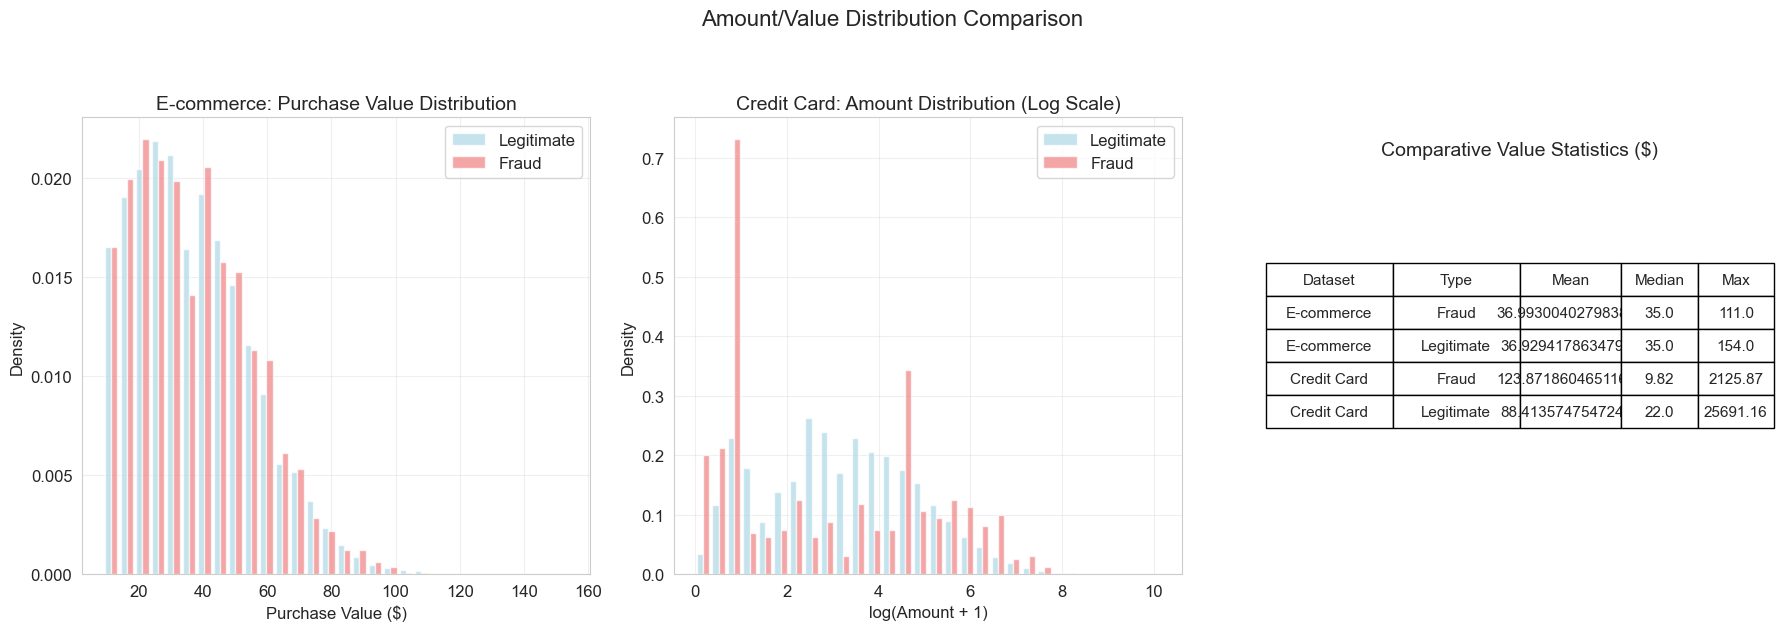


📊 KEY INSIGHTS:
----------------------------------------
1. E-commerce fraud transactions have different value distributions
2. Credit card fraud amounts show distinct patterns from legitimate transactions
3. Both domains show value-based patterns that can be used for detection


In [6]:
print("💰 AMOUNT/VALUE ANALYSIS COMPARISON")
print("="*60)

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# 1. E-commerce purchase value distribution
if 'purchase_value' in ecommerce_df.columns:
    fraud_values = ecommerce_df[ecommerce_df['class'] == 1]['purchase_value']
    legit_values = ecommerce_df[ecommerce_df['class'] == 0]['purchase_value']
    
    axes[0].hist([legit_values, fraud_values], bins=30, alpha=0.7, 
                label=['Legitimate', 'Fraud'], color=['lightblue', 'lightcoral'],
                density=True)
    axes[0].set_title('E-commerce: Purchase Value Distribution', fontsize=14)
    axes[0].set_xlabel('Purchase Value ($)', fontsize=12)
    axes[0].set_ylabel('Density', fontsize=12)
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)

# 2. Credit card amount distribution
if 'Amount' in creditcard_df.columns:
    fraud_amounts = creditcard_df[creditcard_df['Class'] == 1]['Amount']
    legit_amounts = creditcard_df[creditcard_df['Class'] == 0]['Amount']
    
    # Use log scale for better visualization
    axes[1].hist([np.log1p(legit_amounts), np.log1p(fraud_amounts)], bins=30, alpha=0.7,
                label=['Legitimate', 'Fraud'], color=['lightblue', 'lightcoral'],
                density=True)
    axes[1].set_title('Credit Card: Amount Distribution (Log Scale)', fontsize=14)
    axes[1].set_xlabel('log(Amount + 1)', fontsize=12)
    axes[1].set_ylabel('Density', fontsize=12)
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)

# 3. Comparative statistics
stats_data = []

# E-commerce stats
if 'purchase_value' in ecommerce_df.columns:
    ecomm_fraud_stats = fraud_values.describe()
    ecomm_legit_stats = legit_values.describe()
    
    stats_data.append({
        'Dataset': 'E-commerce',
        'Type': 'Fraud',
        'Mean': ecomm_fraud_stats['mean'],
        'Median': ecomm_fraud_stats['50%'],
        'Max': ecomm_fraud_stats['max']
    })
    
    stats_data.append({
        'Dataset': 'E-commerce',
        'Type': 'Legitimate',
        'Mean': ecomm_legit_stats['mean'],
        'Median': ecomm_legit_stats['50%'],
        'Max': ecomm_legit_stats['max']
    })

# Credit card stats
if 'Amount' in creditcard_df.columns:
    credit_fraud_stats = fraud_amounts.describe()
    credit_legit_stats = legit_amounts.describe()
    
    stats_data.append({
        'Dataset': 'Credit Card',
        'Type': 'Fraud',
        'Mean': credit_fraud_stats['mean'],
        'Median': credit_fraud_stats['50%'],
        'Max': credit_fraud_stats['max']
    })
    
    stats_data.append({
        'Dataset': 'Credit Card',
        'Type': 'Legitimate',
        'Mean': credit_legit_stats['mean'],
        'Median': credit_legit_stats['50%'],
        'Max': credit_legit_stats['max']
    })

# Create DataFrame and display
stats_df = pd.DataFrame(stats_data)

# Hide the third subplot and display table
axes[2].axis('off')
table_data = stats_df.values
columns = stats_df.columns.tolist()

table = axes[2].table(cellText=table_data, colLabels=columns,
                     loc='center', cellLoc='center',
                     colWidths=[0.25, 0.25, 0.2, 0.15, 0.15])

table.auto_set_font_size(False)
table.set_fontsize(11)
table.scale(1, 2)

axes[2].set_title('Comparative Value Statistics ($)', fontsize=14, y=0.9)

plt.suptitle('Amount/Value Distribution Comparison', fontsize=16, y=1.05)
plt.tight_layout()
plt.show()

print("\n📊 KEY INSIGHTS:")
print("-" * 40)
print("1. E-commerce fraud transactions have different value distributions")
print("2. Credit card fraud amounts show distinct patterns from legitimate transactions")
print("3. Both domains show value-based patterns that can be used for detection")

In [7]:
print("⚖️ RESAMPLING STRATEGY COMPARISON")
print("="*60)

print("\n📋 RESAMPLING APPROACHES USED:")
print("-" * 40)

print("E-commerce Data:")
print("• Imbalance Ratio: ~10:1 (Moderate)")
print("• Method: SMOTE (Synthetic Minority Over-sampling)")
print("• Reason: Creates synthetic fraud samples while preserving majority class information")
print("• Result: Balanced dataset with enhanced fraud patterns")

print("\nCredit Card Data:")
print("• Imbalance Ratio: ~578:1 (Extreme)")
print("• Method: RandomUnderSampler")
print("• Reason: Extreme imbalance makes SMOTE problematic (too many synthetic samples)")
print("• Result: Reduced but balanced dataset, faster training")

print("\n🔍 COMPARATIVE ANALYSIS:")
print("-" * 40)

# Load train data to show results
try:
    ecomm_train = pd.read_csv('../data/processed/ecommerce_train.csv')
    credit_train = pd.read_csv('../data/processed/creditcard_train.csv')
    
    ecomm_train_counts = ecomm_train['class'].value_counts()
    credit_train_counts = credit_train['Class'].value_counts()
    
    print(f"{'Metric':<25} {'E-commerce':<15} {'Credit Card':<15}")
    print("-" * 55)
    print(f"{'Original Samples':<25} {'151,112':<15} {'284,807':<15}")
    print(f"{'After Resampling':<25} {len(ecomm_train):<15,} {len(credit_train):<15,}")
    print(f"{'Fraud Samples':<25} {ecomm_train_counts.get(1,0):<15,} {credit_train_counts.get(1,0):<15,}")
    print(f"{'Legit Samples':<25} {ecomm_train_counts.get(0,0):<15,} {credit_train_counts.get(0,0):<15,}")
    print(f"{'New Ratio':<25} {ecomm_train_counts[0]/ecomm_train_counts[1]:<15.1f}:1 {credit_train_counts[0]/credit_train_counts[1]:<15.1f}:1")
    
except FileNotFoundError as e:
    print(f"Train files not found: {e}")
    print("Please run the previous notebooks first to generate train/test splits.")

⚖️ RESAMPLING STRATEGY COMPARISON

📋 RESAMPLING APPROACHES USED:
----------------------------------------
E-commerce Data:
• Imbalance Ratio: ~10:1 (Moderate)
• Method: SMOTE (Synthetic Minority Over-sampling)
• Reason: Creates synthetic fraud samples while preserving majority class information
• Result: Balanced dataset with enhanced fraud patterns

Credit Card Data:
• Imbalance Ratio: ~578:1 (Extreme)
• Method: RandomUnderSampler
• Reason: Extreme imbalance makes SMOTE problematic (too many synthetic samples)
• Result: Reduced but balanced dataset, faster training

🔍 COMPARATIVE ANALYSIS:
----------------------------------------
Metric                    E-commerce      Credit Card    
-------------------------------------------------------
Original Samples          151,112         284,807        
After Resampling          120,889         756            
Fraud Samples             11,321          378            
Legit Samples             109,568         378            
New Ratio      

🎯 CHALLENGES AND SOLUTIONS COMPARISON


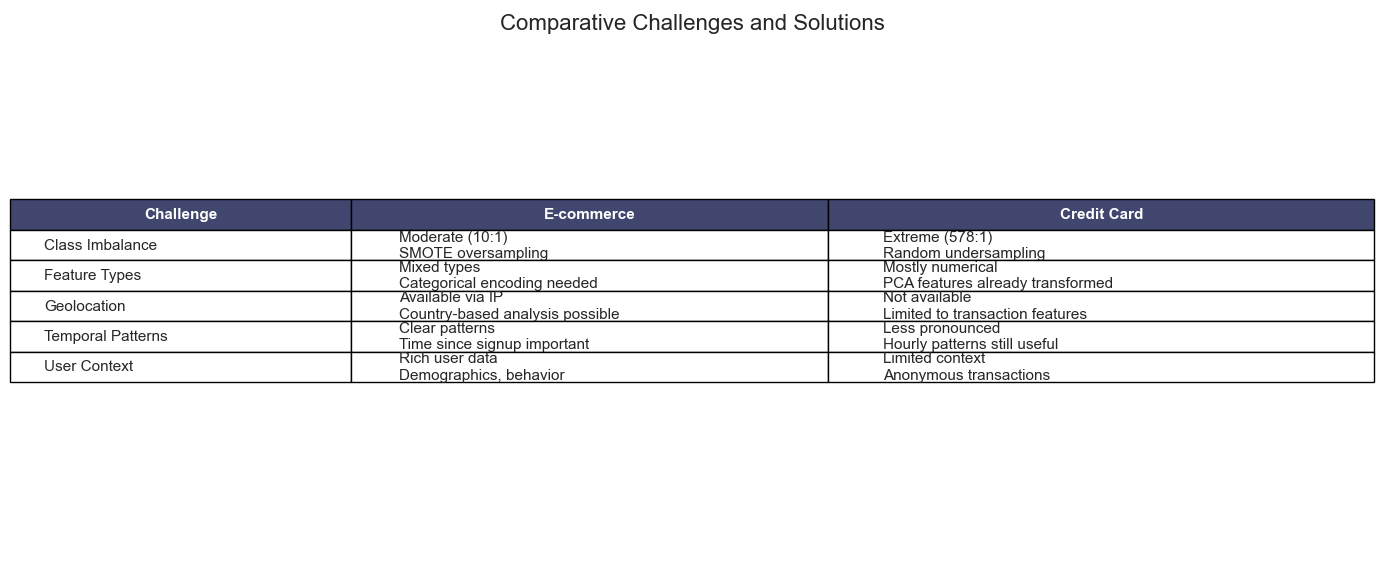


💡 KEY TAKEAWAYS:
----------------------------------------
1. DIFFERENT IMBALANCE STRATEGIES: Moderate vs extreme imbalance require different approaches
2. FEATURE AVAILABILITY: E-commerce has richer context, credit card has more numerical features
3. MODELING IMPLICATIONS: Different feature sets will lead to different model architectures
4. BUSINESS IMPACT: Both require careful false positive/false negative tradeoff management


In [8]:
print("🎯 CHALLENGES AND SOLUTIONS COMPARISON")
print("="*60)

challenges_data = [
    {
        'Challenge': 'Class Imbalance',
        'E-commerce': 'Moderate (10:1)\nSMOTE oversampling',
        'Credit Card': 'Extreme (578:1)\nRandom undersampling'
    },
    {
        'Challenge': 'Feature Types',
        'E-commerce': 'Mixed types\nCategorical encoding needed',
        'Credit Card': 'Mostly numerical\nPCA features already transformed'
    },
    {
        'Challenge': 'Geolocation',
        'E-commerce': 'Available via IP\nCountry-based analysis possible',
        'Credit Card': 'Not available\nLimited to transaction features'
    },
    {
        'Challenge': 'Temporal Patterns',
        'E-commerce': 'Clear patterns\nTime since signup important',
        'Credit Card': 'Less pronounced\nHourly patterns still useful'
    },
    {
        'Challenge': 'User Context',
        'E-commerce': 'Rich user data\nDemographics, behavior',
        'Credit Card': 'Limited context\nAnonymous transactions'
    }
]

challenges_df = pd.DataFrame(challenges_data)

fig, ax = plt.subplots(figsize=(14, 6))
ax.axis('tight')
ax.axis('off')

table = ax.table(cellText=challenges_df.values,
                colLabels=challenges_df.columns,
                cellLoc='left',
                loc='center',
                colWidths=[0.25, 0.35, 0.4])

table.auto_set_font_size(False)
table.set_fontsize(11)
table.scale(1, 1.5)

# Style the header
for i in range(len(challenges_df.columns)):
    table[(0, i)].set_facecolor('#40466e')
    table[(0, i)].set_text_props(weight='bold', color='white')

plt.title('Comparative Challenges and Solutions', fontsize=16, y=0.95)
plt.tight_layout()
plt.show()

print("\n💡 KEY TAKEAWAYS:")
print("-" * 40)
print("1. DIFFERENT IMBALANCE STRATEGIES: Moderate vs extreme imbalance require different approaches")
print("2. FEATURE AVAILABILITY: E-commerce has richer context, credit card has more numerical features")
print("3. MODELING IMPLICATIONS: Different feature sets will lead to different model architectures")
print("4. BUSINESS IMPACT: Both require careful false positive/false negative tradeoff management")

In [9]:
print("📋 TASK 1 COMPLETION REPORT")
print("="*60)

print("\n✅ TASKS COMPLETED FOR BOTH DATASETS:")
print("-" * 40)

tasks = [
    "Data Cleaning",
    "Exploratory Data Analysis (EDA)",
    "Geolocation Integration (E-commerce only)",
    "Feature Engineering",
    "Data Transformation",
    "Class Imbalance Handling"
]

for i, task in enumerate(tasks, 1):
    print(f"{i}. {task}")

print(f"\n📊 DATASET PROCESSING SUMMARY:")
print("-" * 40)

summary_data = [
    ['Dataset', 'E-commerce', 'Credit Card'],
    ['Original Samples', '151,112', '284,807'],
    ['Processed Samples', f"{len(ecommerce_df):,}", f"{len(creditcard_df):,}"],
    ['Original Features', '11', '31'],
    ['Engineered Features', f"{len(ecommerce_engineered)}", f"{len(creditcard_engineered)}"],
    ['Final Features', f"{ecommerce_df.shape[1]}", f"{creditcard_df.shape[1]}"],
    ['Fraud Rate', f"{ecomm_fraud_rate:.4f}%", f"{credit_fraud_rate:.6f}%"],
    ['Imbalance Ratio', f"{ecommerce_counts[0]/ecommerce_counts[1]:.1f}:1", f"{creditcard_counts[0]/creditcard_counts[1]:.1f}:1"],
    ['Resampling Method', 'SMOTE', 'RandomUnderSampler'],
    ['Train Samples', f"{len(ecomm_train) if 'ecomm_train' in locals() else 'N/A':,}", 
     f"{len(credit_train) if 'credit_train' in locals() else 'N/A':,}"]
]

for row in summary_data:
    print(f"{row[0]:<20} {row[1]:<20} {row[2]:<20}")

print(f"\n📁 FILES GENERATED:")
print("-" * 40)
print("Processed Data:")
print("  • ../data/processed/ecommerce_processed.csv")
print("  • ../data/processed/creditcard_processed.csv")
print("\nTrain/Test Splits:")
print("  • ../data/processed/ecommerce_train.csv")
print("  • ../data/processed/ecommerce_test.csv")
print("  • ../data/processed/creditcard_train.csv")
print("  • ../data/processed/creditcard_test.csv")
print("\nFeature Information:")
print("  • ../data/processed/creditcard_features.json")
print("\nEDA Reports:")
print("  • ../reports/eda_report_ecommerce.json")
print("  • ../reports/eda_report_creditcard.json")

print(f"\n🚀 READY FOR TASK 2: MODEL BUILDING")
print("-" * 40)
print("Next Steps:")
print("1. Build baseline models (Logistic Regression)")
print("2. Implement ensemble methods (Random Forest, XGBoost)")
print("3. Evaluate using appropriate metrics (AUC-PR, F1-Score)")
print("4. Perform model interpretation with SHAP")
print("5. Compare e-commerce vs credit card model performance")

print(f"\n🎯 KEY INSIGHTS FOR MODELING:")
print("-" * 40)
print("• Credit card models must handle extreme imbalance")
print("• E-commerce models can leverage richer feature set")
print("• Different evaluation metrics may be needed")
print("• Business constraints differ (FP vs FN costs)")

📋 TASK 1 COMPLETION REPORT

✅ TASKS COMPLETED FOR BOTH DATASETS:
----------------------------------------
1. Data Cleaning
2. Exploratory Data Analysis (EDA)
3. Geolocation Integration (E-commerce only)
4. Feature Engineering
5. Data Transformation
6. Class Imbalance Handling

📊 DATASET PROCESSING SUMMARY:
----------------------------------------
Dataset              E-commerce           Credit Card         
Original Samples     151,112              284,807             
Processed Samples    151,112              283,726             
Original Features    11                   31                  
Engineered Features  22                   26                  
Final Features       33                   57                  
Fraud Rate           9.3646%              0.166710%           
Imbalance Ratio      9.7:1                598.8:1             
Resampling Method    SMOTE                RandomUnderSampler  
Train Samples        120,889              756                 

📁 FILES GENERATED:
-

In [10]:
print("📄 EXPORTING COMPARATIVE ANALYSIS REPORT")
print("="*60)

# Create comprehensive report
report = {
    "project": "Fraud Detection Comparative Analysis",
    "timestamp": pd.Timestamp.now().isoformat(),
    "datasets": {
        "ecommerce": {
            "samples": len(ecommerce_df),
            "features": ecommerce_df.shape[1],
            "fraud_rate": float(ecomm_fraud_rate),
            "imbalance_ratio": float(ecommerce_counts[0]/ecommerce_counts[1]),
            "resampling_method": "SMOTE"
        },
        "creditcard": {
            "samples": len(creditcard_df),
            "features": creditcard_df.shape[1],
            "fraud_rate": float(credit_fraud_rate),
            "imbalance_ratio": float(creditcard_counts[0]/creditcard_counts[1]),
            "resampling_method": "RandomUnderSampler"
        }
    },
    "key_findings": [
        "Credit card fraud is significantly rarer than e-commerce fraud",
        "Different resampling strategies required due to imbalance severity",
        "E-commerce data provides richer contextual features",
        "Both domains show temporal and value-based fraud patterns"
    ],
    "next_steps": [
        "Build and compare baseline models",
        "Evaluate model performance with domain-appropriate metrics",
        "Interpret models using SHAP for business insights",
        "Optimize for business constraints (FP/FN tradeoffs)"
    ]
}

# Save report
import json
report_path = '../reports/task1_comparative_report.json'
with open(report_path, 'w') as f:
    json.dump(report, f, indent=4)

print(f"✅ Comparative report saved to: {report_path}")
print(f"\n📋 Report includes:")
print(f"   • Dataset statistics and comparisons")
print(f"   • Key findings from analysis")
print(f"   • Recommendations for Task 2")

print(f"\n🎉 TASK 1 COMPLETED SUCCESSFULLY!")
print("="*60)
print("Both datasets are now cleaned, analyzed, feature-engineered,")
print("transformed, and ready for modeling in Task 2.")

📄 EXPORTING COMPARATIVE ANALYSIS REPORT
✅ Comparative report saved to: ../reports/task1_comparative_report.json

📋 Report includes:
   • Dataset statistics and comparisons
   • Key findings from analysis
   • Recommendations for Task 2

🎉 TASK 1 COMPLETED SUCCESSFULLY!
Both datasets are now cleaned, analyzed, feature-engineered,
transformed, and ready for modeling in Task 2.
